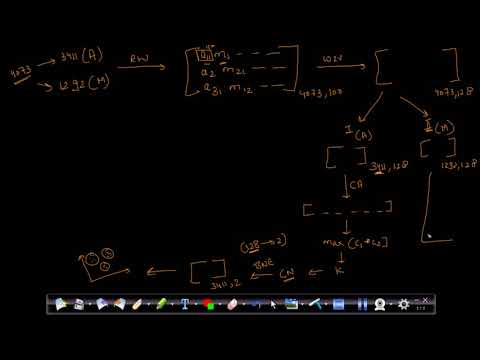

In [16]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='Ufe16ie-BPM', width=600)

In [17]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

ModuleNotFoundError: No module named 'stellargraph'

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>
    
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


<img src='https://i.imgur.com/4SPYPFa.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

In [4]:
# hint: you can refer facebook case study notebook to solve this assignment in couple of hours
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [6]:
edges = [tuple(x) for x in data.values.tolist()]
edges

[('m1', 'a1'),
 ('m2', 'a1'),
 ('m2', 'a2'),
 ('m3', 'a1'),
 ('m3', 'a3'),
 ('m3', 'a4'),
 ('m3', 'a5'),
 ('m3', 'a6'),
 ('m3', 'a7'),
 ('m4', 'a1'),
 ('m4', 'a10'),
 ('m4', 'a8'),
 ('m4', 'a9'),
 ('m5', 'a1'),
 ('m5', 'a11'),
 ('m5', 'a12'),
 ('m5', 'a13'),
 ('m5', 'a14'),
 ('m5', 'a15'),
 ('m5', 'a16'),
 ('m5', 'a17'),
 ('m5', 'a18'),
 ('m5', 'a19'),
 ('m7', 'a21'),
 ('m7', 'a22'),
 ('m8', 'a22'),
 ('m9', 'a22'),
 ('m9', 'a23'),
 ('m10', 'a22'),
 ('m10', 'a24'),
 ('m10', 'a25'),
 ('m11', 'a22'),
 ('m11', 'a26'),
 ('m11', 'a27'),
 ('m11', 'a28'),
 ('m11', 'a29'),
 ('m24', 'a47'),
 ('m25', 'a47'),
 ('m25', 'a48'),
 ('m25', 'a49'),
 ('m25', 'a50'),
 ('m25', 'a51'),
 ('m25', 'a52'),
 ('m25', 'a53'),
 ('m25', 'a54'),
 ('m25', 'a55'),
 ('m25', 'a56'),
 ('m25', 'a57'),
 ('m25', 'a58'),
 ('m25', 'a59'),
 ('m25', 'a60'),
 ('m25', 'a61'),
 ('m25', 'a62'),
 ('m25', 'a63'),
 ('m25', 'a64'),
 ('m25', 'a65'),
 ('m25', 'a66'),
 ('m25', 'a67'),
 ('m25', 'a68'),
 ('m25', 'a69'),
 ('m25', 'a70'),
 ('m

In [9]:
#Creating bipartite graph and labeling edges here
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')
l, r = nx.bipartite.sets(B)

In [8]:
#Total number of nodes and edges present
print("number of nodes", B.number_of_nodes())
print("number of edges", B.number_of_edges())

number of nodes 4703
number of edges 9650


In [10]:
#Find out the nodes, how many are from from Actor and movie
movies = []
actors = []
for i in B.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


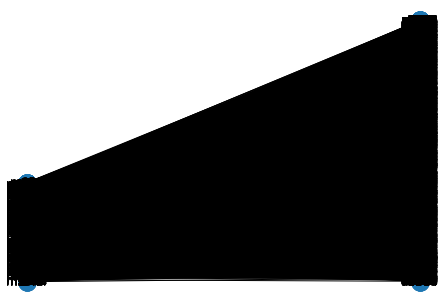

In [11]:
l, r = nx.bipartite.sets(B)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos, with_labels=True)
plt.show()

In [14]:
#Creating ramdom walker now
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(B))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(B.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

NameError: name 'UniformRandomMetaPathWalk' is not defined

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph